## SHAP example for KNN classifier

https://archive.ics.uci.edu/ml/datasets/adult

In [11]:
!pip install shap

In [12]:
import sklearn
import shap

In [22]:
X,y = shap.datasets.adult()
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [24]:
X.drop(["Occupation","Workclass","Marital Status", "Country", "Race", "Relationship"], axis = 1, inplace = True)
X

,Age,Education-Num,Sex,Capital Gain,Capital Loss,Hours per week
0,39.0,13.0,1,2174.0,0.0,40.0
1,50.0,13.0,1,0.0,0.0,13.0
2,38.0,9.0,1,0.0,0.0,40.0
3,53.0,7.0,1,0.0,0.0,40.0
4,28.0,13.0,0,0.0,0.0,40.0
...,...,...,...,...,...,...
32556,27.0,12.0,0,0.0,0.0,38.0
32557,40.0,9.0,1,0.0,0.0,40.0
32558,58.0,9.0,0,0.0,0.0,40.0
32559,22.0,9.0,1,0.0,0.0,20.0


## Load Data

In [ ]:
X,y = shap.datasets.adult()

#X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [25]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [26]:
X_train

,Age,Education-Num,Sex,Capital Gain,Capital Loss,Hours per week
12011,51.0,10.0,0,0.0,0.0,40.0
23599,51.0,14.0,1,0.0,0.0,50.0
23603,21.0,11.0,1,0.0,0.0,40.0
6163,25.0,10.0,1,0.0,0.0,24.0
14883,48.0,13.0,1,0.0,0.0,38.0
...,...,...,...,...,...,...
5699,23.0,9.0,1,0.0,0.0,40.0
10742,37.0,9.0,1,0.0,0.0,40.0
16921,27.0,5.0,1,0.0,0.0,40.0
25796,46.0,16.0,1,0.0,2415.0,55.0


In [27]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:100,:])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not 

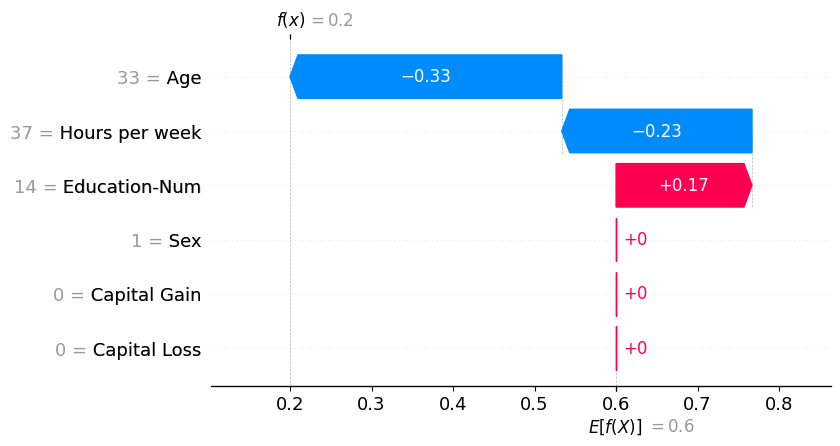

In [31]:
shap.plots.waterfall(shap_values[10])

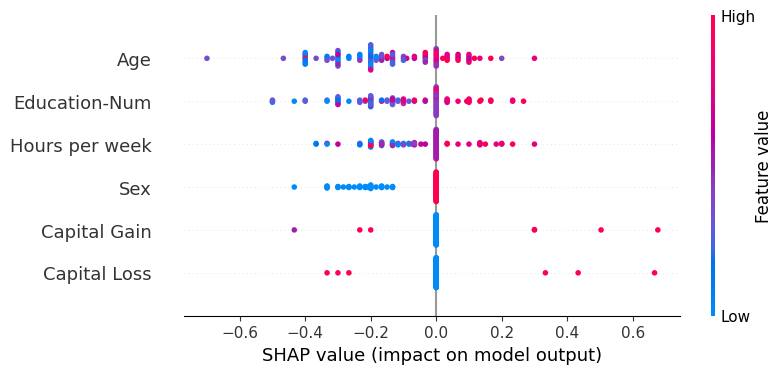

In [32]:
shap.plots.beeswarm(shap_values)

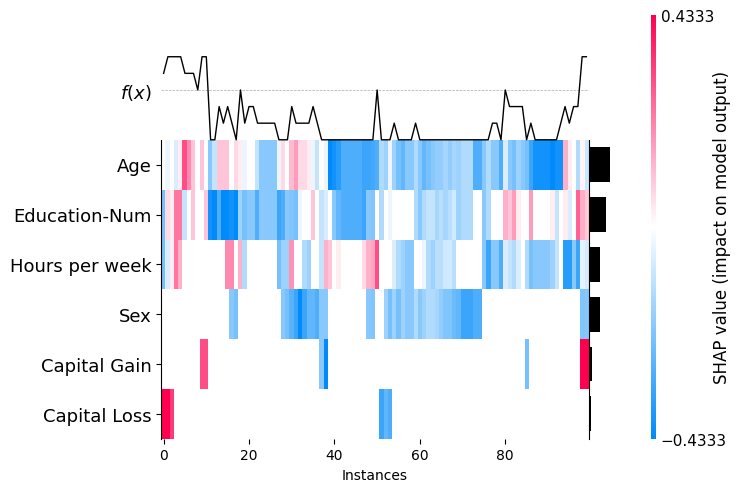

<Axes: xlabel='Instances'>

In [33]:
shap.plots.heatmap(shap_values)

In [ ]:
# normalize data
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
X_train_norm = X_train.copy()
X_valid_norm = X_valid.copy()
for k,dtype in dtypes:
    m = X_train[k].mean()
    s = X_train[k].std()
    X_train_norm[k] -= m
    X_train_norm[k] /= s

    X_valid_norm[k] -= m
    X_valid_norm[k] /= s

In [ ]:
knn_norm = sklearn.neighbors.KNeighborsClassifier()
knn_norm.fit(X_train_norm, y_train)

In [ ]:
f = lambda x: knn_norm.predict_proba(x)[:,1]
med = X_train_norm.median().values.reshape((1,X_train_norm.shape[1]))

explainer = shap.Explainer(f, med)

shap_values_norm = explainer(X_valid_norm.iloc[0:100,:])

In [ ]:
shap.plots.waterfall(shap_values_norm[28])

In [ ]:
shap.summary_plot(shap_values_norm, X_valid.iloc[0:100,:])

In [ ]:
shap.plots.scatter(shap_values_norm[:,"Education-Num"])

In [ ]:
shap_values_norm